### This notebook classifies the samples based on their spectral peaks.

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

A function for examining model metrics

In [17]:
def calculate_metrics(y_test, y_pred):

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {overall_accuracy}\n")

    # Calculate precision, recall, and F1-score for each class
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # Show the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)


Read in the dataset.

In [18]:
#df = pd.read_csv("../../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../../data/scaled_and_noise_removal.csv")
#pivoted_df = pd.read_csv("../../data/Unscaled_Baseline_Correction.csv")
#pivoted_df = pd.read_csv("../../data/Scaled_Baseline_Correction.csv")
df = pd.read_csv("../../data/current_clean_spectrum.csv")
#df = pd.read_csv("../../data/scaling_test.csv")

In [19]:
# fastRP_df = pd.read_csv("../../data/fastRP_embeddings.csv")
# statuses_df = pd.read_csv("../../data/SpecIDs_and_Status.csv")
# pivoted_df = fastRP_df.merge(statuses_df, on="SpecID").sort_values(by="SpecID").set_index('SpecID')

In [20]:
df.head()

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,0.013923
1,201210-1-00,294,400.91116,201210-1,Normal,0.014031
2,201210-1-00,295,401.59454,201210-1,Normal,0.014106
3,201210-1-00,296,402.27789,201210-1,Normal,0.014150
4,201210-1-00,297,402.96127,201210-1,Normal,0.014168


In [21]:
sample = df[df['SpecID'] == "210526-3-15"]

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

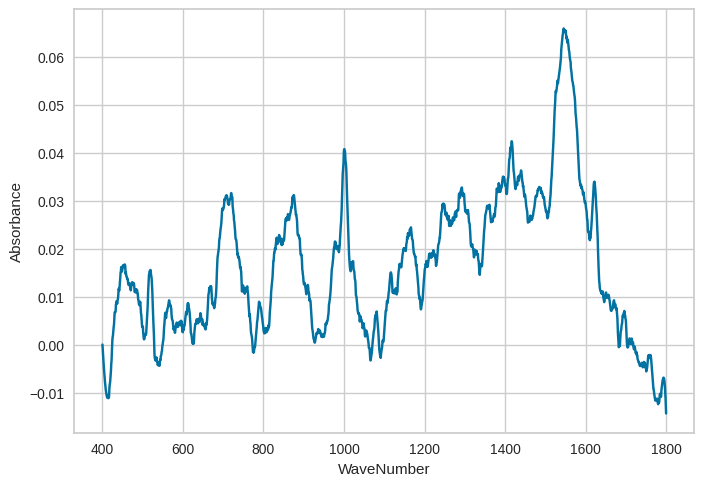

In [22]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

Pivot the Dataframe to create a column for each wavelength

In [23]:
pivoted_df = df.pivot(index='SpecID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None
statuses = df[['SpecID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SpecID')
pivoted_df = pivoted_df.set_index('SpecID')

In [24]:
pivoted_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,0.013923,0.014031,0.014106,0.014150,0.014168,0.014161,0.014133,0.014086,0.014025,0.013951,...,-0.004448,-0.004742,-0.005111,-0.005563,-0.006104,-0.006743,-0.007485,-0.008338,-0.009309,Normal
201210-1-01,0.014083,0.014325,0.014549,0.014756,0.014948,0.015127,0.015295,0.015453,0.015603,0.015747,...,-0.004506,-0.004412,-0.004318,-0.004226,-0.004135,-0.004047,-0.003962,-0.003882,-0.003808,Normal
201210-1-02,0.016363,0.015768,0.015249,0.014799,0.014416,0.014095,0.013831,0.013620,0.013458,0.013340,...,-0.004084,-0.004070,-0.004054,-0.004036,-0.004019,-0.004001,-0.003984,-0.003969,-0.003956,Normal
201210-1-03,0.018585,0.018533,0.018476,0.018414,0.018347,0.018277,0.018203,0.018127,0.018048,0.017967,...,-0.004918,-0.004898,-0.004864,-0.004812,-0.004741,-0.004651,-0.004538,-0.004402,-0.004242,Normal
201210-1-04,0.033055,0.031164,0.029491,0.028022,0.026748,0.025655,0.024731,0.023966,0.023347,0.022863,...,-0.013601,-0.013570,-0.013515,-0.013437,-0.013335,-0.013209,-0.013059,-0.012885,-0.012686,Normal


##### PyCaret

In [25]:
import pandas as pd
from pycaret.classification import *

Set up the PyCaret environment

In [26]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,0.013923
1,201210-1-00,294,400.91116,201210-1,Normal,0.014031
2,201210-1-00,295,401.59454,201210-1,Normal,0.014106
3,201210-1-00,296,402.27789,201210-1,Normal,0.014150
4,201210-1-00,297,402.96127,201210-1,Normal,0.014168
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,-0.006661
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,-0.006354
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,-0.006018
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,-0.005651


In [27]:
caret = setup(data=pivoted_df, target='Status', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(3045, 2050)"
5,Transformed data shape,"(3045, 2050)"
6,Transformed train set shape,"(2131, 2050)"
7,Transformed test set shape,"(914, 2050)"
8,Numeric features,2049
9,Preprocess,True


Compare models

In [28]:
compare_models(exclude=['lightgbm', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8710,0.0000,0.8710,0.8762,0.8711,0.8065,0.8088,0.4340
rf,Random Forest Classifier,0.8494,0.0000,0.8494,0.8558,0.8501,0.7743,0.7766,0.9190
knn,K Neighbors Classifier,0.8278,0.0000,0.8278,0.8363,0.8279,0.7417,0.7454,0.2120
svm,SVM - Linear Kernel,0.6959,0.0000,0.6959,0.7148,0.6908,0.5431,0.5527,0.3150
ridge,Ridge Classifier,0.6800,0.0000,0.6800,0.6835,0.6796,0.5184,0.5200,0.2450
dt,Decision Tree Classifier,0.6799,0.0000,0.6799,0.6814,0.6797,0.5187,0.5194,0.7720
ada,Ada Boost Classifier,0.6743,0.0000,0.6743,0.6772,0.6739,0.5103,0.5117,3.6970
lr,Logistic Regression,0.6528,0.0000,0.6528,0.6558,0.6520,0.4776,0.4793,0.5470
nb,Naive Bayes,0.5547,0.0000,0.5547,0.5868,0.5543,0.3383,0.3492,0.1940
lda,Linear Discriminant Analysis,0.4171,0.0000,0.4171,0.4202,0.4171,0.1258,0.1262,1.9050


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1234, verbose=0,
                     warm_start=False)

Create the model

In [ ]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8411,0.0000,0.8411,0.8537,0.8414,0.7624,0.7678
1,0.8779,0.0000,0.8779,0.8807,0.8782,0.8168,0.8178
2,0.8451,0.0000,0.8451,0.8533,0.8467,0.7679,0.7703
3,0.8592,0.0000,0.8592,0.8636,0.8585,0.7890,0.7916
4,0.8357,0.0000,0.8357,0.8505,0.8381,0.7543,0.7591
5,0.8263,0.0000,0.8263,0.8263,0.8253,0.7387,0.7396
6,0.8732,0.0000,0.8732,0.8755,0.8737,0.8097,0.8102
7,0.8779,0.0000,0.8779,0.8815,0.8776,0.8161,0.8182
8,0.8545,0.0000,0.8545,0.8585,0.8550,0.7818,0.7831


In [15]:
#tuned_model = tune_model(model)
tuned_model = tune_model(model, n_iter=10, search_library='optuna')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:44:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2024-03-13 22:45:00,342] Searching the best hyperparameters using 2131 samples...


KeyboardInterrupt: 

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…